# Country_wide_COVID 19_Datasets 

#### Content

The dataset contains data about the numbers of tests, cases, deaths, serious/critical cases, active cases and recovered cases in each country for every day since April 18, and also contains the population of each country to calculate per-capita penetration of the virus

Additionally, an auxiliary table with information about the fraction of the general population at different age groups for every country is added (taken from Wikipedia). This is specifically relevant since COVID-19 death rate is very much age dependent.

#### Acknowledgements

The people at "www.worldometers.info" collecting and maintaining this site really are doing very important work
https://www.worldometers.info/coronavirus/#countries
Data about age structure for every country comes from wikipedia
Inspiration

It's possible to use this dataset for various purposes and analyses
My goal will be to use the additional data about the number of tests performed in each country to estimate the true death rate of COVID-19 and examine the relationship with age .(Consider the both files for understanding the scenario.)


https://github.com/dsrscientist/COVID_19_Datasets/blob/master/worldometer_snapshots_April18_to_May18.csv



https://github.com/dsrscientist/COVID_19_Datasets/blob/master/population_structure_by_age_per_contry.csv

#### Importing or calling all necessary models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [13]:
df_w=pd.read_csv('covid19w.txt',parse_dates=[0])
df_w.head(10)

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0
5,2020-04-18,Italy,60471924,1305833.0,175925.0,23227.0,44927.0,2733.0,107771.0
6,2020-04-18,France,65256826,463662.0,151793.0,19323.0,35983.0,5833.0,96487.0
7,2020-04-18,Germany,83752855,1728357.0,143724.0,4538.0,85400.0,2922.0,53786.0
8,2020-04-18,Turkey,84230075,598933.0,82329.0,1890.0,10453.0,1894.0,69986.0
9,2020-04-18,Iran,83862642,330137.0,80868.0,5031.0,55987.0,3513.0,19850.0


In [3]:
df_a=pd.read_csv('covid19a.txt')
df_a

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,USA,0.189,0.657,0.154
1,Russia,0.176,0.682,0.142
2,Spain,0.147,0.659,0.194
3,Brazil,0.217,0.697,0.086
4,UK,0.177,0.638,0.185
...,...,...,...,...
208,St. Barth,NaN,NaN,NaN
209,Western Sahara,NaN,NaN,NaN
210,Anguilla,NaN,NaN,NaN
211,Lesotho,0.354,0.601,0.045


In [4]:
#First five data rows of the data
df_a.head()

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,USA,0.189,0.657,0.154
1,Russia,0.176,0.682,0.142
2,Spain,0.147,0.659,0.194
3,Brazil,0.217,0.697,0.086
4,UK,0.177,0.638,0.185


In [5]:
#Last five data rows of the data
df_w.tail()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
6598,2020-05-18,St. Barth,9874,NaN,6.0,NaN,6.0,NaN,0.0
6599,2020-05-18,Western Sahara,595462,NaN,6.0,NaN,6.0,NaN,0.0
6600,2020-05-18,Anguilla,14987,NaN,3.0,NaN,3.0,NaN,0.0
6601,2020-05-18,Lesotho,2140235,NaN,1.0,NaN,NaN,NaN,1.0
6602,2020-05-18,Saint Pierre Miquelon,5797,NaN,1.0,NaN,1.0,NaN,0.0


In [6]:
#Information regarding our data:
df_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 6603 non-null   datetime64[ns]
 1   Country              6603 non-null   object        
 2   Population           6603 non-null   int64         
 3   Total Tests          5505 non-null   float64       
 4   Total Cases          6554 non-null   float64       
 5   Total Deaths         5367 non-null   float64       
 6   Total Recovered      6318 non-null   float64       
 7   Serious or Critical  4117 non-null   float64       
 8   Active Cases         6544 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 464.4+ KB


In [7]:
#Information regarding our data:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   213 non-null    object 
 1   Fraction age 0-14 years   176 non-null    float64
 2   Fraction age 15-64 years  176 non-null    float64
 3   Fraction age 65+ years    176 non-null    float64
dtypes: float64(3), object(1)
memory usage: 6.8+ KB


In [8]:
df_w.describe()

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
count,6.603000e+03,5.505000e+03,6.554000e+03,5367.000000,6318.000000,4117.000000,6.544000e+03
mean,3.637913e+07,2.167252e+05,1.692968e+04,1416.252096,5855.424185,386.748360,9.964142e+03
std,1.411537e+08,7.595143e+05,8.861467e+04,6645.247810,23467.641235,1658.428324,6.541025e+04
min,8.010000e+02,1.000000e+01,1.000000e+00,0.000000,1.000000,1.000000,0.000000e+00
25%,8.672680e+05,2.690000e+03,7.900000e+01,6.000000,26.000000,3.000000,2.600000e+01
50%,6.859926e+06,2.547800e+04,6.135000e+02,24.000000,219.000000,13.000000,2.720000e+02
75%,2.546422e+07,1.437810e+05,4.877500e+03,199.000000,1394.750000,89.000000,2.041000e+03
max,1.439324e+09,1.230074e+07,1.550294e+06,91981.000000,356383.000000,18671.000000,1.101930e+06


The description of the above dataset entrails the total count followed by mean , standard deviation , minimum , maximum , median , 1st and 3rd quartile.

If we consider the total deaths among all the attributes then our count is 5367 by the countries on the different dates , our mean or average deaths took place is at 1416 which is having the standard deviation of 6645, minimum is 0 and maximum is at 91981 , median is at 24 if we consider all the dates and countries. 

Like wise we could see the detailed information about all other attributes.

In [9]:
df_a.describe()

,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
count,176.000000,176.000000,176.000000
mean,0.276098,0.636109,0.087731
std,0.106748,0.066543,0.062522
min,0.115000,0.472000,0.011000
25%,0.177000,0.596750,0.034000
50%,0.266500,0.649000,0.063500
75%,0.368250,0.675250,0.143250
max,0.502000,0.850000,0.270000


The description of the above df_a whic is the fraction of the age of the people which are affected by the covid-19 entrails the total count followed by mean , standard deviation , minimum , maximum , median , 1st and 3rd quartile.

In [14]:
#sub table of a specific country:
country_name='USA'
country_df = df_w.loc[df_w['Country'] == country_name,:].reset_index(drop=True)
country_df

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-19,USA,330774664,3861549.0,763832.0,40553.0,71003.0,13566.0,652276.0
2,2020-04-20,USA,330774664,4026360.0,792759.0,42514.0,72389.0,13951.0,677856.0
3,2020-04-21,USA,330774664,4187392.0,818744.0,45318.0,82923.0,14016.0,690503.0
4,2020-04-22,USA,330774664,4325342.0,848717.0,47659.0,84050.0,14016.0,717008.0
5,2020-04-23,USA,330774664,4696704.0,880204.0,49845.0,85922.0,14997.0,744437.0
6,2020-04-24,USA,330774664,5015602.0,925038.0,52185.0,110432.0,15097.0,762421.0
7,2020-04-25,USA,330774664,5279237.0,960651.0,54256.0,118162.0,15110.0,788233.0
8,2020-04-26,USA,330774664,5470464.0,987160.0,55413.0,118781.0,15143.0,812966.0
9,2020-04-27,USA,330774664,5696928.0,1010356.0,56797.0,138990.0,14186.0,814569.0


In [17]:
#sub table of a specific date:
from datetime import datetime
selected_date = datetime.strptime('18/05/2020', '%d/%m/%Y')
lastdate_df = df_w.loc[df_w['Date'] == selected_date.strftime('%Y-%m-%d'), :].reset_index(drop=True)
lastdate_df

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-05-18,USA,330774664,12300744.0,1550294.0,91981.0,356383.0,16868.0,1101930.0
1,2020-05-18,Russia,145927292,7147014.0,290678.0,2722.0,70209.0,2300.0,217747.0
2,2020-05-18,Spain,46752703,3037840.0,278188.0,27709.0,196958.0,1152.0,53521.0
3,2020-05-18,Brazil,212380932,735224.0,255368.0,16853.0,100459.0,8318.0,138056.0
4,2020-05-18,UK,67844241,2682716.0,246406.0,34796.0,NaN,1559.0,NaN
...,...,...,...,...,...,...,...,...,...
208,2020-05-18,St. Barth,9874,NaN,6.0,NaN,6.0,NaN,0.0
209,2020-05-18,Western Sahara,595462,NaN,6.0,NaN,6.0,NaN,0.0
210,2020-05-18,Anguilla,14987,NaN,3.0,NaN,3.0,NaN,0.0
211,2020-05-18,Lesotho,2140235,NaN,1.0,NaN,NaN,NaN,1.0


### Calculation of death rate for each country

In [18]:
lastdate_df['Case Fatality Ratio'] = lastdate_df['Total Deaths'] / lastdate_df['Total Cases']

In [19]:
lastdate_df

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Case Fatality Ratio
0,2020-05-18,USA,330774664,12300744.0,1550294.0,91981.0,356383.0,16868.0,1101930.0,0.059331
1,2020-05-18,Russia,145927292,7147014.0,290678.0,2722.0,70209.0,2300.0,217747.0,0.009364
2,2020-05-18,Spain,46752703,3037840.0,278188.0,27709.0,196958.0,1152.0,53521.0,0.099605
3,2020-05-18,Brazil,212380932,735224.0,255368.0,16853.0,100459.0,8318.0,138056.0,0.065995
4,2020-05-18,UK,67844241,2682716.0,246406.0,34796.0,NaN,1559.0,NaN,0.141214
...,...,...,...,...,...,...,...,...,...,...
208,2020-05-18,St. Barth,9874,NaN,6.0,NaN,6.0,NaN,0.0,NaN
209,2020-05-18,Western Sahara,595462,NaN,6.0,NaN,6.0,NaN,0.0,NaN
210,2020-05-18,Anguilla,14987,NaN,3.0,NaN,3.0,NaN,0.0,NaN
211,2020-05-18,Lesotho,2140235,NaN,1.0,NaN,NaN,NaN,1.0,NaN


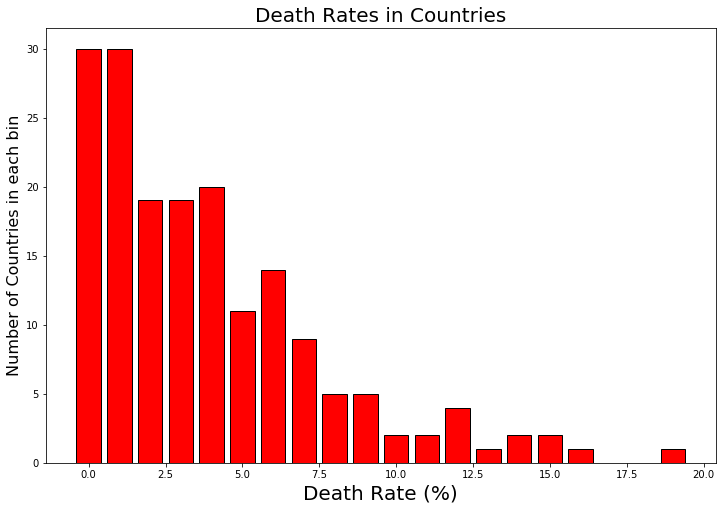

In [20]:
bins = np.arange(21)
counts, _ = np.histogram(100 * np.array(lastdate_df['Case Fatality Ratio']), bins=bins)

plt.figure(figsize=(12,8))
plt.bar(bins[:-1], counts, facecolor='red', edgecolor='black')
plt.xlabel('Death Rate (%)', fontsize=20)
plt.ylabel('Number of Countries in each bin', fontsize=16)
plt.title('Death Rates in Countries', fontsize=20);

We are seeing a large spread of death rates between various countries in the above graph.

With respect to this, it shouldn't be the case normally, as humans are getting affected in various regions of the country.

Within the data we could see that there are few countries who are having small amount of cases, maybe the spread is due to small samples sizes for countries with small amounts of cases or population.

Hence, I am going to filter out the countries with small amount of cases.


In [57]:
min_cases = 500

df_most_affected = lastdate_df.loc[lastdate_df['Total Cases'] > min_cases,:]

In [58]:
df_most_affected

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Case Fatality Ratio,Num Tests per Positive Case
0,2020-05-18,USA,330774664,12300744.0,1550294.0,91981.0,356383.0,16868.0,1101930.0,0.059331,7.934459
1,2020-05-18,Russia,145927292,7147014.0,290678.0,2722.0,70209.0,2300.0,217747.0,0.009364,24.587392
2,2020-05-18,Spain,46752703,3037840.0,278188.0,27709.0,196958.0,1152.0,53521.0,0.099605,10.920097
3,2020-05-18,Brazil,212380932,735224.0,255368.0,16853.0,100459.0,8318.0,138056.0,0.065995,2.879076
4,2020-05-18,UK,67844241,2682716.0,246406.0,34796.0,NaN,1559.0,NaN,0.141214,10.887381
...,...,...,...,...,...,...,...,...,...,...,...
122,2020-05-18,Haiti,11385726,2120.0,533.0,21.0,21.0,NaN,491.0,0.039400,3.977486
123,2020-05-18,Jamaica,2959659,8515.0,520.0,9.0,127.0,NaN,384.0,0.017308,16.375000
124,2020-05-18,Chad,16364523,NaN,519.0,53.0,117.0,NaN,349.0,0.102119,NaN
125,2020-05-18,Sierra Leone,7956645,NaN,519.0,33.0,148.0,NaN,338.0,0.063584,NaN


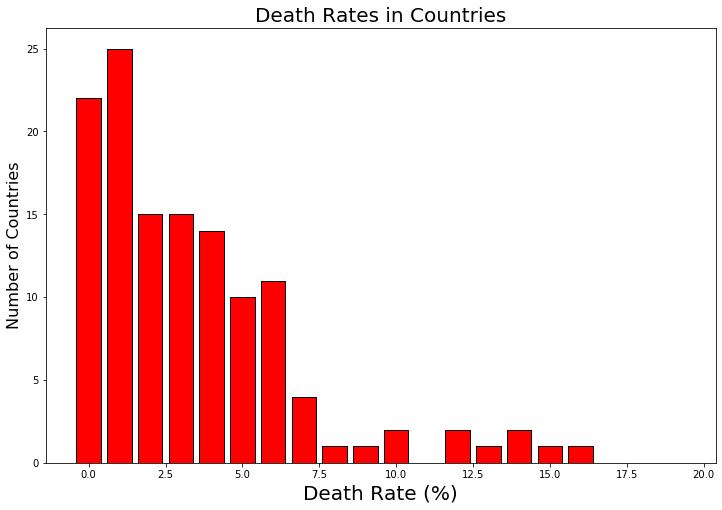

In [59]:
bins = np.arange(21)
counts, _ = np.histogram(100 * np.array(df_most_affected['Case Fatality Ratio']), bins=bins)

plt.figure(figsize=(12,8))
plt.bar(bins[:-1], counts, facecolor='red', edgecolor='black')
plt.xlabel('Death Rate (%)', fontsize=20)
plt.ylabel('Number of Countries', fontsize=16)
plt.title('Death Rates in Countries', fontsize=20);

With the above graph we could see that the spred is reduced little bit, also it is shown that mostly countries with high fatality rate are low in countries were maximum countries have death rate ranging from 0 to 5.

#### Death rate VS Number of tests per positive cases:

posx and posy should be finite values
posx and posy should be finite values


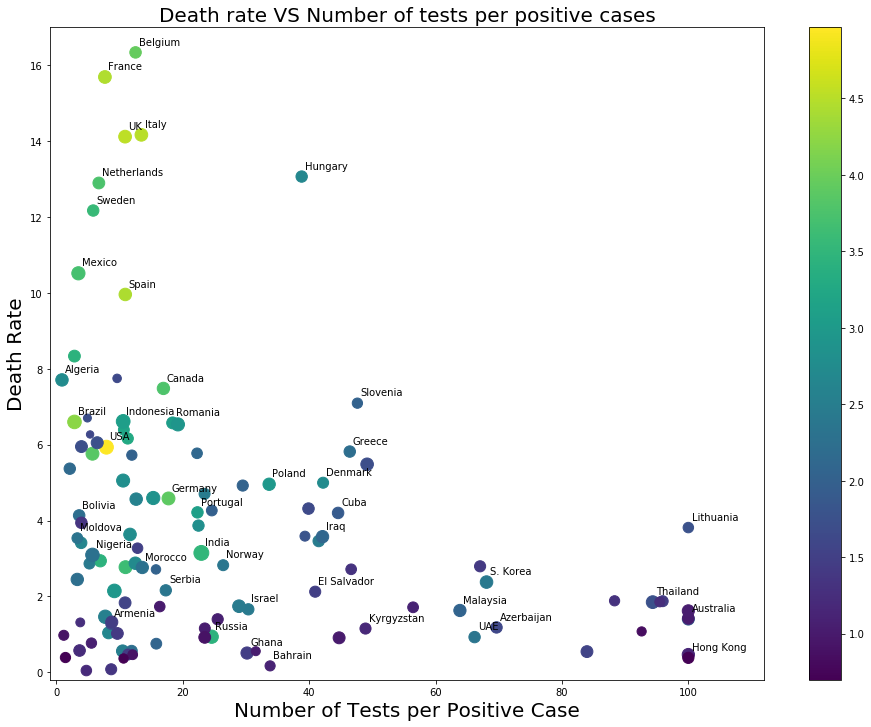

In [65]:
lastdate_df['Num Tests per Positive Case'] = lastdate_df['Total Tests']/ lastdate_df['Total Cases']
min_number_of_cases = 500
df_most_affected = lastdate_df.loc[lastdate_df['Total Cases'] > min_number_of_cases,:]
x_axis_limit = 100
# limit the x-axis
death_rate_percent = 100 * np.array(df_most_affected['Case Fatality Ratio'])
num_test_per_positive = np.array(df_most_affected['Num Tests per Positive Case'])
num_test_per_positive[num_test_per_positive > x_axis_limit] = x_axis_limit

total_num_deaths = np.array(df_most_affected['Total Deaths'])
population = np.array(df_most_affected['Population'])

plt.figure(figsize=(16,12))
plt.scatter(x=num_test_per_positive, y=death_rate_percent, 
            s=0.5*np.power(np.log(1+population),2), 
            c=np.log10(1+total_num_deaths))
plt.colorbar()
plt.ylabel('Death Rate', fontsize=20)
plt.xlabel('Number of Tests per Positive Case', fontsize=20)
plt.title('Death rate VS Number of tests per positive cases', fontsize=20)
plt.xlim(-1, x_axis_limit + 12)
plt.ylim(-0.2,17)
# plotting names of the countries_to_display = df_most_affected['Country'].unique().tolist()

countries_to_display = ['USA', 'Russia', 'Spain', 'Brazil', 'UK', 'Italy', 'France', 
                        'Germany', 'India', 'Canada', 'Belgium', 'Mexico', 'Netherlands', 
                        'Sweden', 'Portugal', 'UAE', 'Poland', 'Indonesia', 'Romania', 
                        'Israel','Thailand','Kyrgyzstan','El Salvador', 'S. Korea', 
                        'Denmark', 'Serbia', 'Norway', 'Algeria', 'Bahrain','Slovenia',
                        'Greece','Cuba','Hong Kong','Lithuania', 'Australia', 'Morocco', 
                        'Malaysia', 'Nigeria', 'Moldova', 'Ghana', 'Armenia', 'Bolivia', 
                        'Iraq', 'Hungary', 'Cameroon', 'Azerbaijan']

for country_name in countries_to_display:
    country_index = df_most_affected.index[df_most_affected['Country'] == country_name]
    plt.text(x=num_test_per_positive[country_index] + 0.5,
             y=death_rate_percent[country_index] + 0.2,
             s=country_name, fontsize=10)
plt.show()

Right side of the graph color bar represents the total number of deaths (on a log scale).

Graph present us the plotting of the countries with respect to the number of tests per positive case is being done to the death rate of the for each countries on a single day.

In the above scale we could see that Death rate is maximum for the country Belgium whichis followed by france.
Thiland , australia and hong kong has low death rate as the population is less but the testing is more as they have less population.

For India I could see that number of tests per positive case is happening around 24 where the death rate is almost 3.4% and it is in green in colour which tells us that deaths are taking place in high numbers.

In [66]:
lastdate_df

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Case Fatality Ratio,Num Tests per Positive Case
0,2020-05-18,USA,330774664,12300744.0,1550294.0,91981.0,356383.0,16868.0,1101930.0,0.059331,7.934459
1,2020-05-18,Russia,145927292,7147014.0,290678.0,2722.0,70209.0,2300.0,217747.0,0.009364,24.587392
2,2020-05-18,Spain,46752703,3037840.0,278188.0,27709.0,196958.0,1152.0,53521.0,0.099605,10.920097
3,2020-05-18,Brazil,212380932,735224.0,255368.0,16853.0,100459.0,8318.0,138056.0,0.065995,2.879076
4,2020-05-18,UK,67844241,2682716.0,246406.0,34796.0,NaN,1559.0,NaN,0.141214,10.887381
...,...,...,...,...,...,...,...,...,...,...,...
208,2020-05-18,St. Barth,9874,NaN,6.0,NaN,6.0,NaN,0.0,NaN,NaN
209,2020-05-18,Western Sahara,595462,NaN,6.0,NaN,6.0,NaN,0.0,NaN,NaN
210,2020-05-18,Anguilla,14987,NaN,3.0,NaN,3.0,NaN,0.0,NaN,NaN
211,2020-05-18,Lesotho,2140235,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN


### Best testing countries
Lets decide that the cutoff for "good testing country" is 55 tests per positive case (less than 2% positivity rate).

In [67]:
good_testing = 30
good_testing_df = df_most_affected.loc[df_most_affected['Num Tests per Positive Case'] > good_testing,:]
good_testing_df = good_testing_df.reset_index(drop=True)
good_testing_df

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Case Fatality Ratio,Num Tests per Positive Case
0,2020-05-18,UAE,9875965,1600923.0,24190.0,224.0,9577.0,1.0,14389.0,0.009260,66.181191
1,2020-05-18,Poland,37851327,636046.0,18885.0,936.0,7628.0,160.0,10321.0,0.049563,33.679958
2,2020-05-18,Israel,8638917,505702.0,16643.0,276.0,13253.0,52.0,3114.0,0.016584,30.385267
3,2020-05-18,S. Korea,51264120,753211.0,11065.0,263.0,9904.0,55.0,898.0,0.023769,68.071487
4,2020-05-18,Denmark,5789832,463016.0,10968.0,548.0,9301.0,26.0,1119.0,0.049964,42.215171
5,2020-05-18,Czechia,10706690,356515.0,8586.0,297.0,5641.0,36.0,2648.0,0.034591,41.522828
6,2020-05-18,Bahrain,1693667,243031.0,7184.0,12.0,2931.0,8.0,4241.0,0.001670,33.829482
7,2020-05-18,Australia,25464216,1062034.0,7060.0,99.0,6392.0,12.0,569.0,0.014023,150.429745
8,2020-05-18,Malaysia,32315733,443263.0,6941.0,113.0,5615.0,13.0,1213.0,0.016280,63.861547
9,2020-05-18,Kazakhstan,18749587,540708.0,6440.0,35.0,3469.0,31.0,2936.0,0.005435,83.960870


### Calculating the Death Rate for the above 12 countries

In [68]:
death_rate = 100 * good_testing_df['Total Deaths'].sum() / good_testing_df['Total Cases'].sum()

print('Death Rate only for "good testing countries" is %.2f%s' %(death_rate,'%'))

Death Rate only for "good testing countries" is 2.59%


## Examine relationship with age

### Merging the two tables:

In [69]:
df_most_affected

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Case Fatality Ratio,Num Tests per Positive Case
0,2020-05-18,USA,330774664,12300744.0,1550294.0,91981.0,356383.0,16868.0,1101930.0,0.059331,7.934459
1,2020-05-18,Russia,145927292,7147014.0,290678.0,2722.0,70209.0,2300.0,217747.0,0.009364,24.587392
2,2020-05-18,Spain,46752703,3037840.0,278188.0,27709.0,196958.0,1152.0,53521.0,0.099605,10.920097
3,2020-05-18,Brazil,212380932,735224.0,255368.0,16853.0,100459.0,8318.0,138056.0,0.065995,2.879076
4,2020-05-18,UK,67844241,2682716.0,246406.0,34796.0,NaN,1559.0,NaN,0.141214,10.887381
...,...,...,...,...,...,...,...,...,...,...,...
122,2020-05-18,Haiti,11385726,2120.0,533.0,21.0,21.0,NaN,491.0,0.039400,3.977486
123,2020-05-18,Jamaica,2959659,8515.0,520.0,9.0,127.0,NaN,384.0,0.017308,16.375000
124,2020-05-18,Chad,16364523,NaN,519.0,53.0,117.0,NaN,349.0,0.102119,NaN
125,2020-05-18,Sierra Leone,7956645,NaN,519.0,33.0,148.0,NaN,338.0,0.063584,NaN


In [44]:
df_a

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,USA,0.189,0.657,0.154
1,Russia,0.176,0.682,0.142
2,Spain,0.147,0.659,0.194
3,Brazil,0.217,0.697,0.086
4,UK,0.177,0.638,0.185
...,...,...,...,...
208,St. Barth,NaN,NaN,NaN
209,Western Sahara,NaN,NaN,NaN
210,Anguilla,NaN,NaN,NaN
211,Lesotho,0.354,0.601,0.045


In [71]:
#merging both the dataset above:
df_merge=df_most_affected.merge(df_a, on='Country')
df_merge

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Case Fatality Ratio,Num Tests per Positive Case,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,2020-05-18,USA,330774664,12300744.0,1550294.0,91981.0,356383.0,16868.0,1101930.0,0.059331,7.934459,0.189,0.657,0.154
1,2020-05-18,Russia,145927292,7147014.0,290678.0,2722.0,70209.0,2300.0,217747.0,0.009364,24.587392,0.176,0.682,0.142
2,2020-05-18,Spain,46752703,3037840.0,278188.0,27709.0,196958.0,1152.0,53521.0,0.099605,10.920097,0.147,0.659,0.194
3,2020-05-18,Brazil,212380932,735224.0,255368.0,16853.0,100459.0,8318.0,138056.0,0.065995,2.879076,0.217,0.697,0.086
4,2020-05-18,UK,67844241,2682716.0,246406.0,34796.0,NaN,1559.0,NaN,0.141214,10.887381,0.177,0.638,0.185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,2020-05-18,Haiti,11385726,2120.0,533.0,21.0,21.0,NaN,491.0,0.039400,3.977486,0.330,0.622,0.048
123,2020-05-18,Jamaica,2959659,8515.0,520.0,9.0,127.0,NaN,384.0,0.017308,16.375000,0.227,0.676,0.097
124,2020-05-18,Chad,16364523,NaN,519.0,53.0,117.0,NaN,349.0,0.102119,NaN,0.471,0.504,0.025
125,2020-05-18,Sierra Leone,7956645,NaN,519.0,33.0,148.0,NaN,338.0,0.063584,NaN,0.421,0.554,0.025


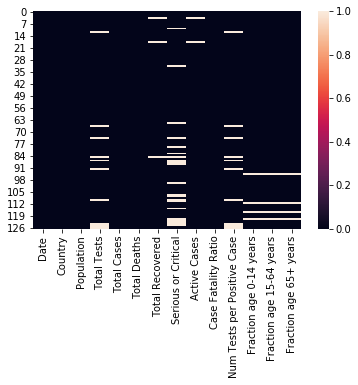

In [72]:
#Checking Missing values:
sns.heatmap(df_merge.isnull())

The above graph is here to show that if there are any null values in the above dataset, I have found out that the black color shows the '0' value here, it means that none of the value is empty(Null Values), where the white lines shows the precence of the null values in our dataset.

In order to get more clearity we have taken out the sum of the total Null Values down which is also showing there are null valuess presnt in various data attributes.

Hence we will be treating the same.

In [73]:
df_merge.isnull().sum()

Date                            0
Country                         0
Population                      0
Total Tests                    10
Total Cases                     0
Total Deaths                    0
Total Recovered                 3
Serious or Critical            21
Active Cases                    2
Case Fatality Ratio             0
Num Tests per Positive Case    10
Fraction age 0-14 years         4
Fraction age 15-64 years        4
Fraction age 65+ years          4
dtype: int64

#Pandas dataframe.ffill() function is used to fill the missing value in the dataframe. ‘ffill’ stands for ‘forward fill’ and will propagate last valid observation forward.

In [76]:
data_frame_list = [df_merge]
for df_merge in data_frame_list:
    df_merge.ffill(inplace=True)
print (data_frame_list)

[          Date       Country  Population  Total Tests  Total Cases  \
0   2020-05-18           USA   330774664   12300744.0    1550294.0   
1   2020-05-18        Russia   145927292    7147014.0     290678.0   
2   2020-05-18         Spain    46752703    3037840.0     278188.0   
3   2020-05-18        Brazil   212380932     735224.0     255368.0   
4   2020-05-18            UK    67844241    2682716.0     246406.0   
..         ...           ...         ...          ...          ...   
122 2020-05-18         Haiti    11385726       2120.0        533.0   
123 2020-05-18       Jamaica     2959659       8515.0        520.0   
124 2020-05-18          Chad    16364523       8515.0        519.0   
125 2020-05-18  Sierra Leone     7956645       8515.0        519.0   
126 2020-05-18      Tanzania    59512999       8515.0        509.0   

     Total Deaths  Total Recovered  Serious or Critical  Active Cases  \
0         91981.0         356383.0              16868.0     1101930.0   
1          2

In [78]:
#Missing values have been removed:
df_merge.isnull().sum()

Date                           0
Country                        0
Population                     0
Total Tests                    0
Total Cases                    0
Total Deaths                   0
Total Recovered                0
Serious or Critical            0
Active Cases                   0
Case Fatality Ratio            0
Num Tests per Positive Case    0
Fraction age 0-14 years        0
Fraction age 15-64 years       0
Fraction age 65+ years         0
dtype: int64

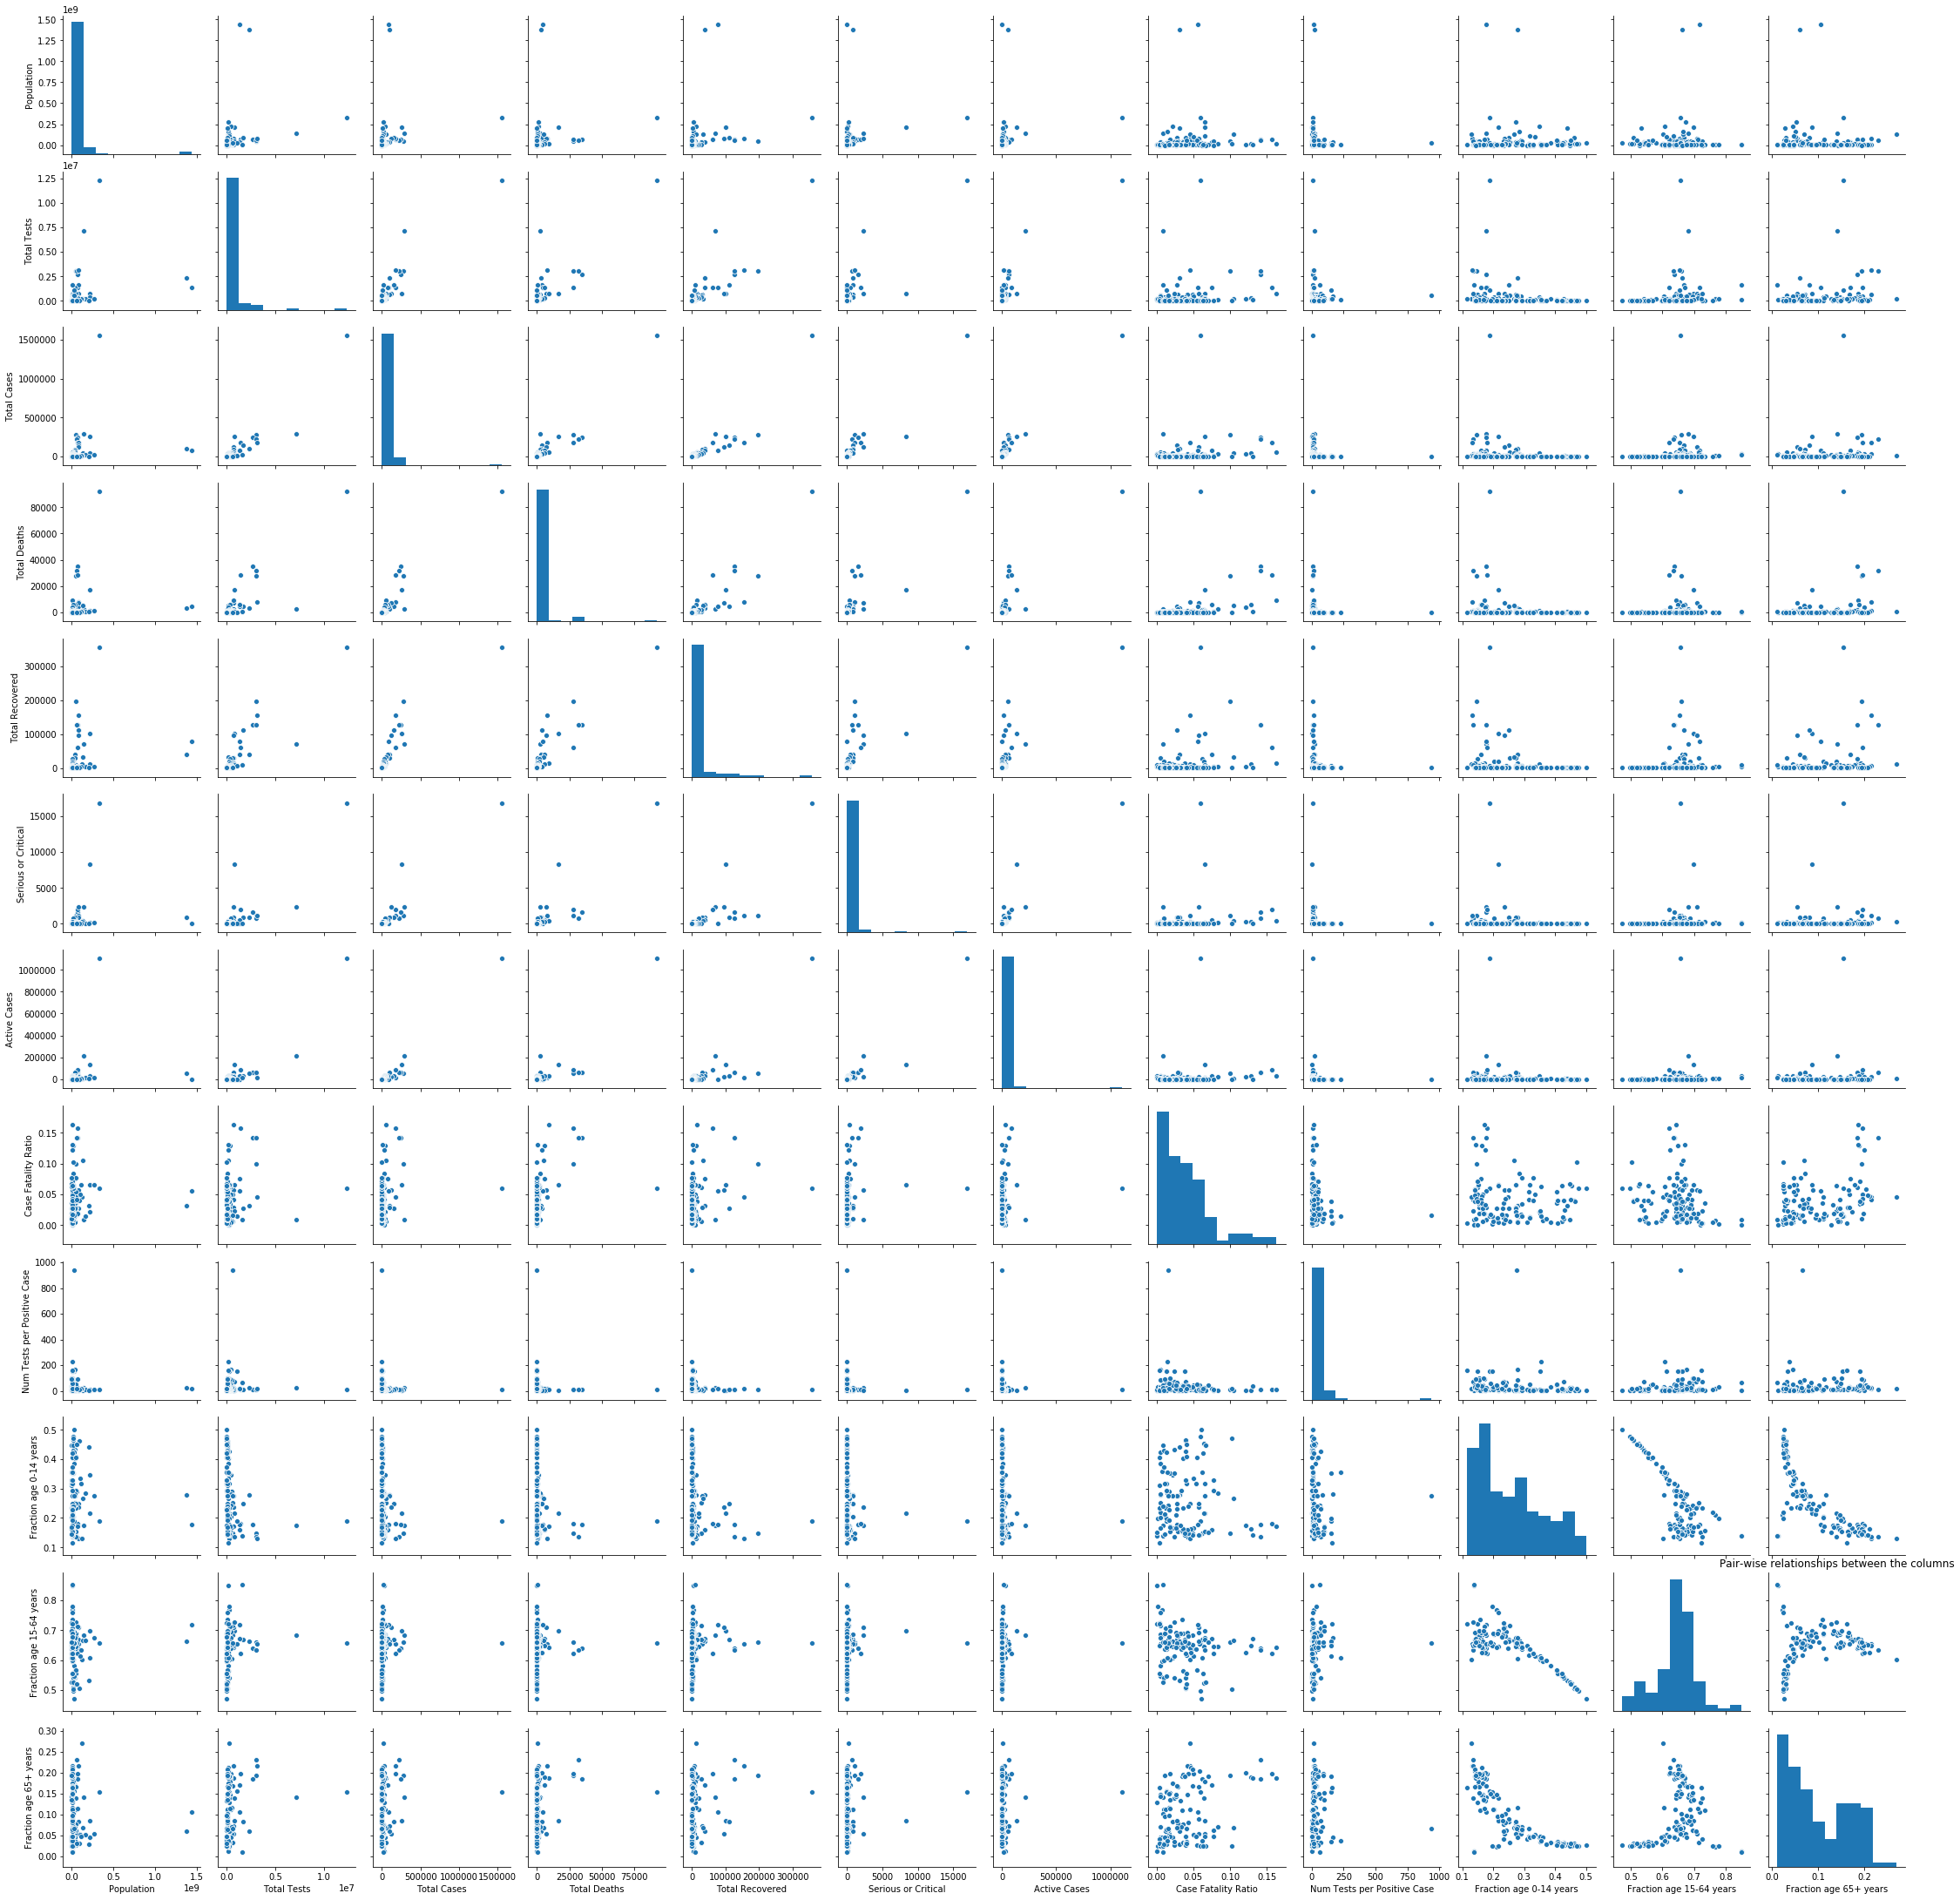

In [79]:
ax = sns.pairplot(df_merge)
plt.title('Pair-wise relationships between the columns')
plt.show()

Pairplot has been constucted above to show or allow us the see both the distribution of each variables and also to show the relationship between each of the two variables, "/" -->shows the positive corelation where as "\\" -->shows negative corelation for some there are holizontal lines which shows neutral relationship with each other.

Through the above and below graph we have come accros to the attributes or the fields which are positively corelated or neutral corelated to each other, Hence we would be taking all of them in to the consideration.

These fields are some what showing neutral correlation with each other. The below graph shows is the stucture of corelation between each of the variables with respect to the heatmap.
The black dots represent negative corelation where as off white color shows the positive corelation.

There are few field which is showing negative relationship with some of the other fields . 

###### Fraction age 0-14 years , Fraction age 15-64 years

We will remove these field before modeling our data.

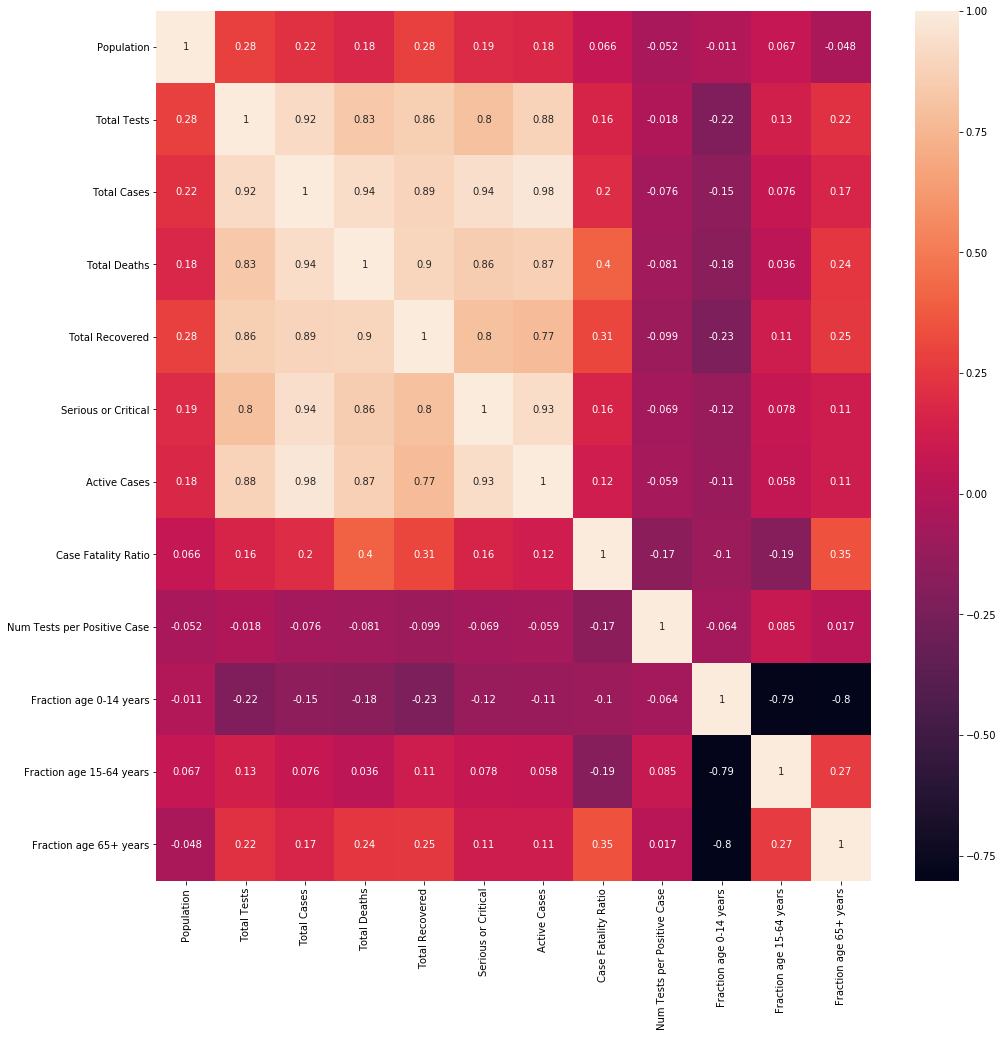

In [80]:
corr_hmap=df_merge.corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr_hmap,annot=True)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fca57fba290>,
      dtype=object)

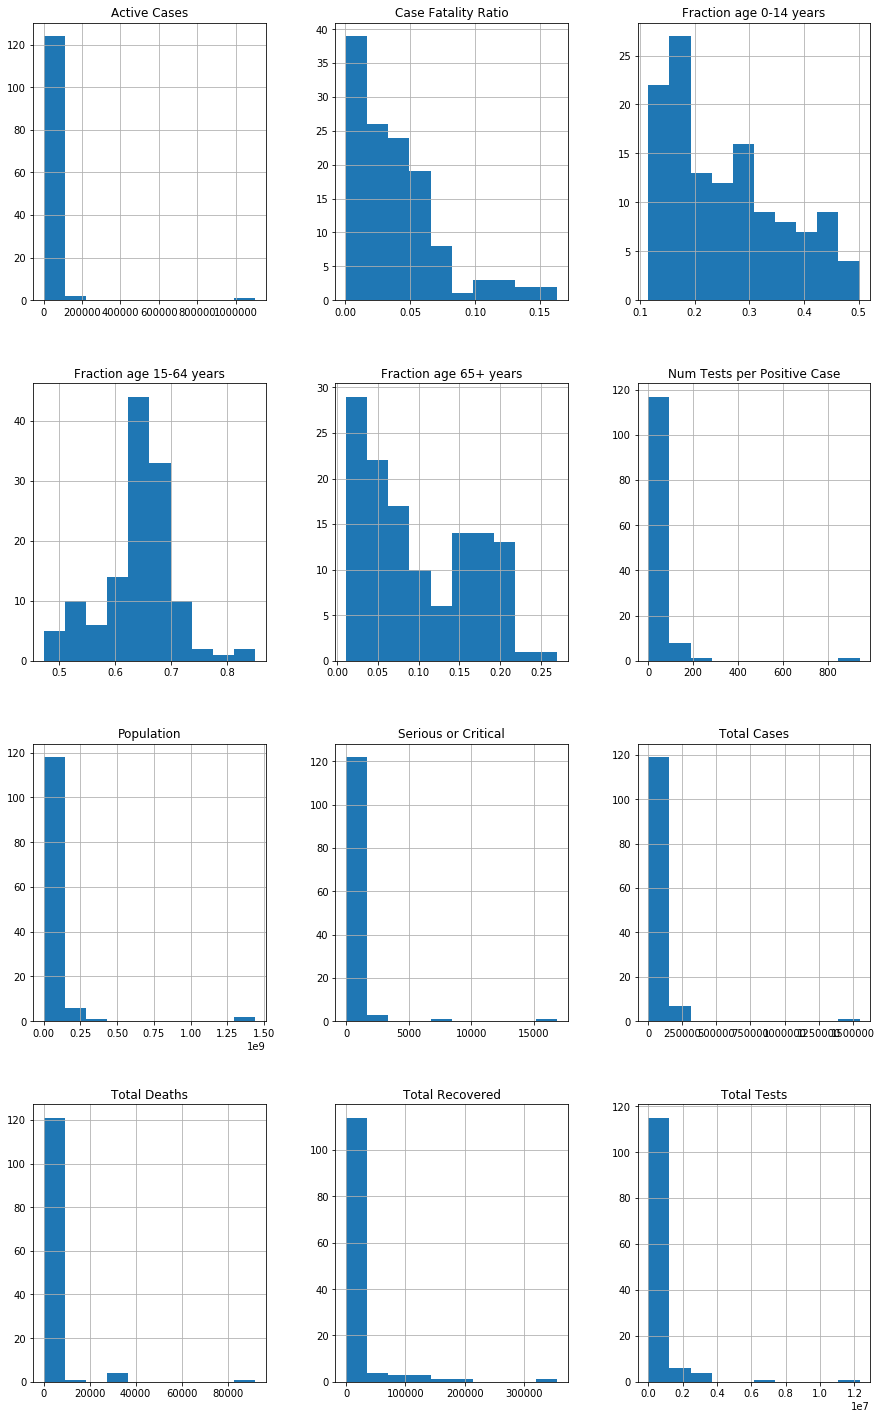

In [85]:
df_merge.hist(figsize=(15,25))

The above histogram graph shows value count of the readings of the various variables:

1. Fraction age of 65+ years are distributed in such a way that almost 75% of the countries have fractio less than 1.1 .

2. Around 90 % of the country having number of tests per positive cases below 100, so there are more case positive.
3. Around 50000 most of the countries have recovered cases.
4. Almost 120 countries total deaths have crossed more than 10000 bar 
5. Around 95 countries have case fatality ratio below .5 .


Like wise we could identify such readings from the above graphs.

In [86]:
df_merge.columns.to_series().groupby(df_merge.dtypes).groups

{dtype('<M8[ns]'): Index(['Date'], dtype='object'),
 dtype('int64'): Index(['Population'], dtype='object'),
 dtype('float64'): Index(['Total Tests', 'Total Cases', 'Total Deaths', 'Total Recovered',
        'Serious or Critical', 'Active Cases', 'Case Fatality Ratio',
        'Num Tests per Positive Case', 'Fraction age 0-14 years',
        'Fraction age 15-64 years', 'Fraction age 65+ years'],
       dtype='object'),
 dtype('O'): Index(['Country'], dtype='object')}

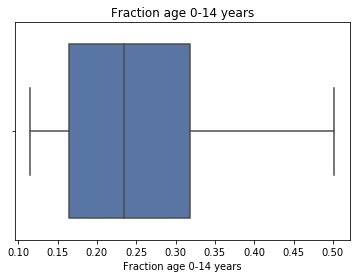

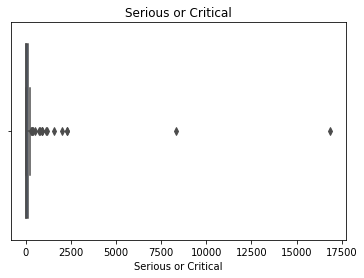

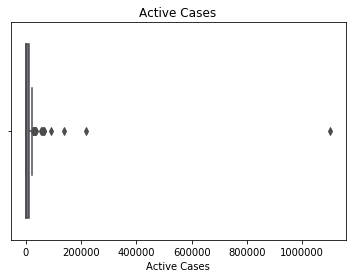

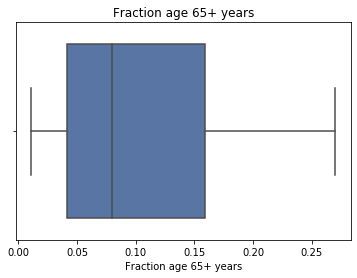

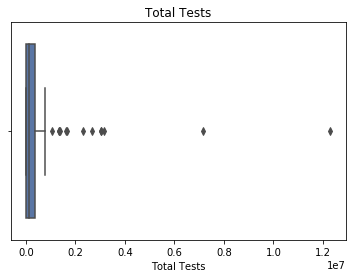

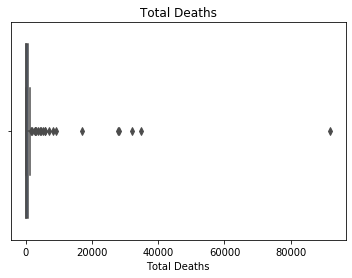

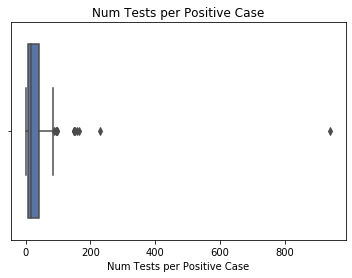

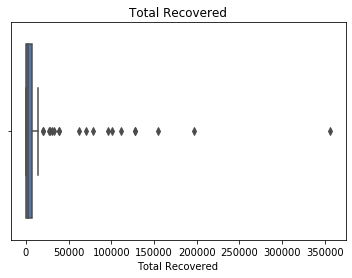

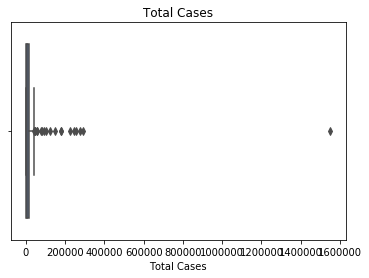

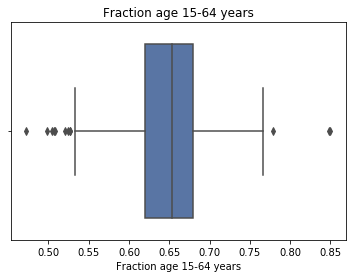

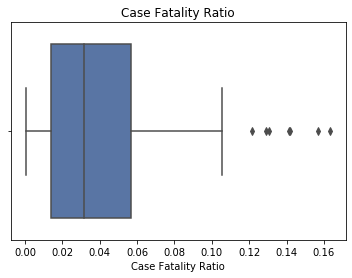

In [87]:
columns={'Total Tests', 'Total Cases', 'Total Deaths', 'Total Recovered',
        'Serious or Critical', 'Active Cases', 'Case Fatality Ratio',
        'Num Tests per Positive Case', 'Fraction age 0-14 years',
        'Fraction age 15-64 years', 'Fraction age 65+ years'}
for i in columns:
    plt.figure()
    plt.clf()
    sns.boxplot(df_merge[i],palette="deep")
    plt.title(i)
    plt.show()

The plot box situated above are representing the minimum value , maximum value and showing the median value for the variables.

In some of the variables such as 'Total Tests', 'Total Cases', 'Total Deaths', 'Total Recovered','Serious or Critical', 'Active Cases', 'Case Fatality Ratio','Num Tests per Positive Case','Fraction age 15-64 years',etc..

The graph shows some poiters above or below the graph which is used to detect if there are any outliers presnt in the datasets or not.

If the detection is accurate then we should be able to treat them in order to get the perfect outcome or result.

Outliers here are the observations that we find at the abnormal distance from other values.

Text(0.5, 1.0, 'Case Fatality Ratio VS Country')

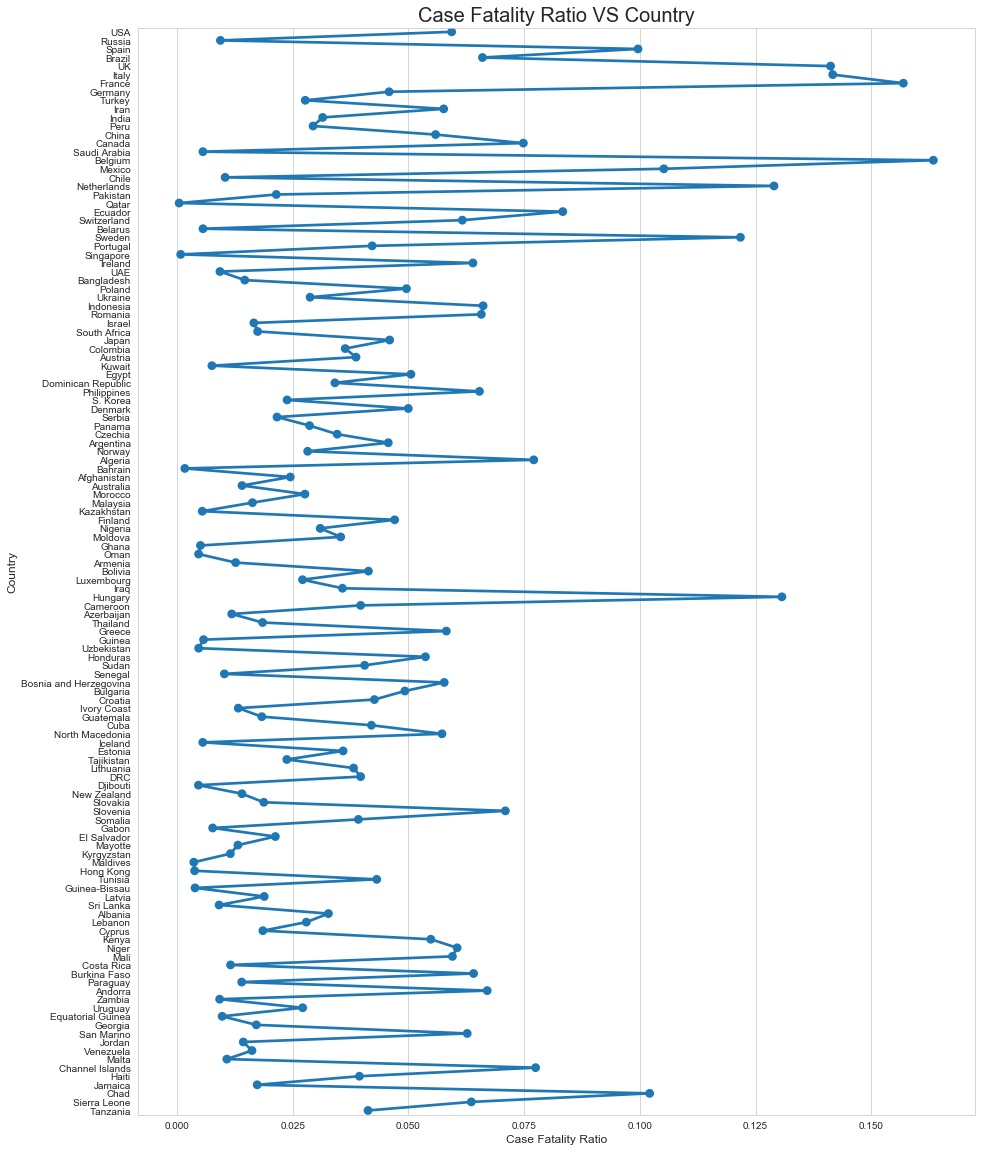

In [92]:
plt.figure(figsize=(15,20))
sns.set_style('whitegrid')
sns.pointplot(x='Case Fatality Ratio', y='Country', data=df_merge,join=True)
plt.xlabel('Case Fatality Ratio',{'fontsize' : 'large'})
plt.ylabel('Country',{'fontsize':'large'})
plt.title("Case Fatality Ratio VS Country",{'fontsize':20})

In the above point plot it is determined Case Fatality Ratio with respect to the different Country. It has been find out that the highest Case Fatality Ratio is Belgium which is followed by Italy , UK and Brazil.

Text(0.5, 1.0, 'Fraction age 65+ years VS Country')

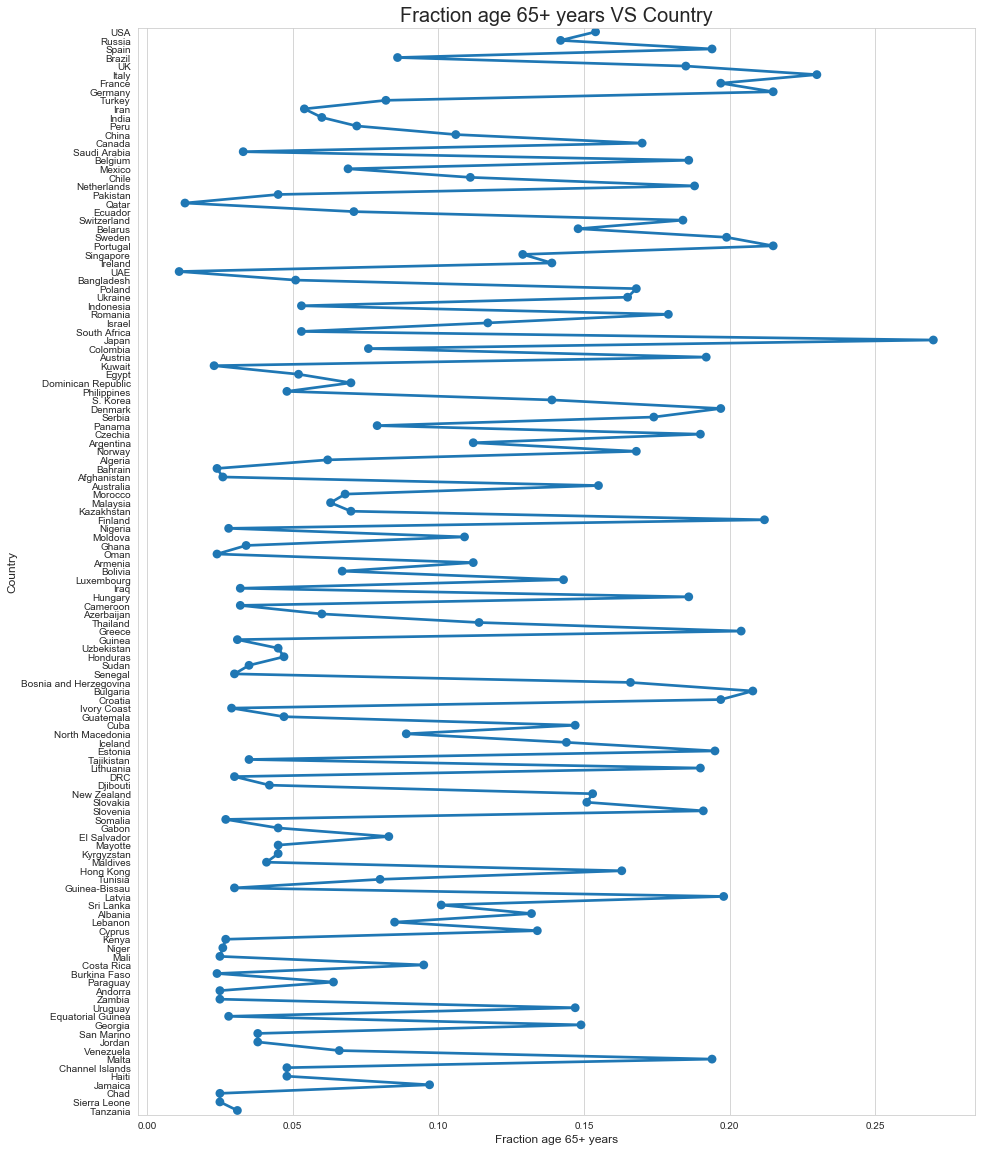

In [95]:
plt.figure(figsize=(15,20))
sns.set_style('whitegrid')
sns.pointplot(x='Fraction age 65+ years', y='Country', data=df_merge,join=True)
plt.xlabel('Fraction age 65+ years',{'fontsize' : 'large'})
plt.ylabel('Country',{'fontsize':'large'})
plt.title("Fraction age 65+ years VS Country",{'fontsize':20})

In the above point plot it is determined Fraction age 65+ years with respect to the different Country. It has been find out that the highest Fraction age 65+ years is Japan which is followed by Italy , Germany and France. It figures out the population of people with age more than 65 years are more in the above countries and which causes more deaths in these countries.

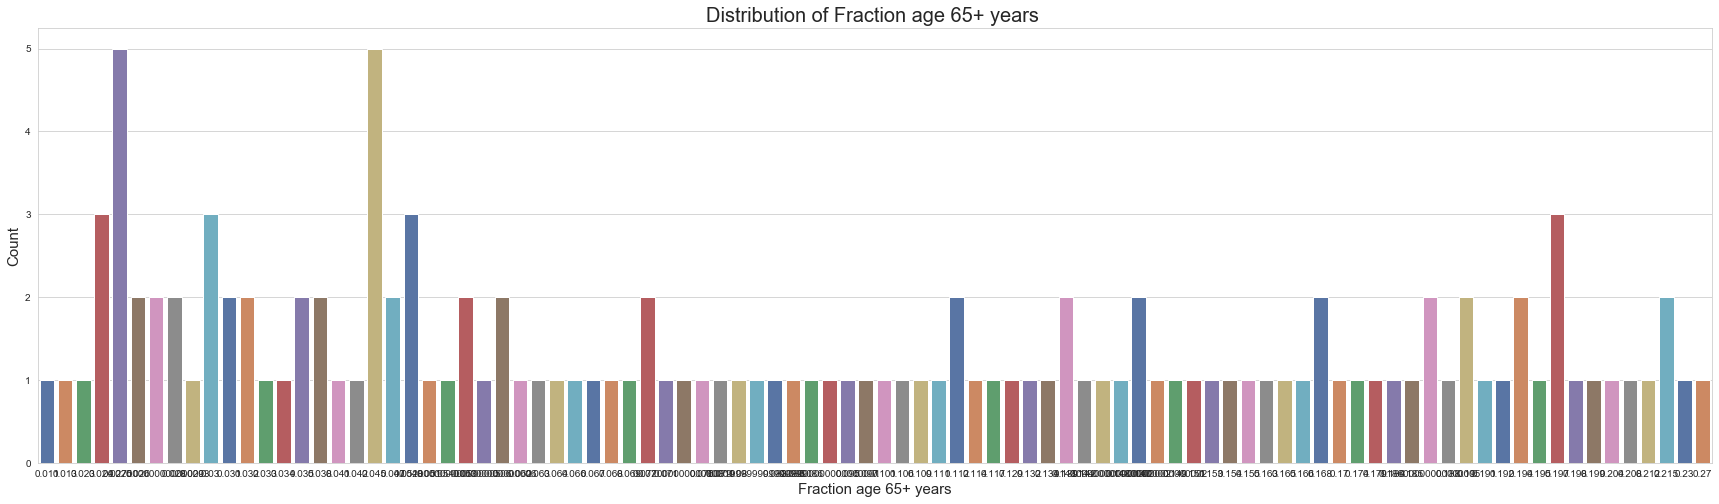

In [99]:
plt.figure(figsize=(30,8))
sns.countplot(x = df_merge['Fraction age 65+ years'],palette='deep')
plt.xlabel('Fraction age 65+ years', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
plt.title("Distribution of Fraction age 65+ years ",fontsize= 20)
plt.show()

The above graph shows the countr plot for the Fraction age 65+ years among the countries.

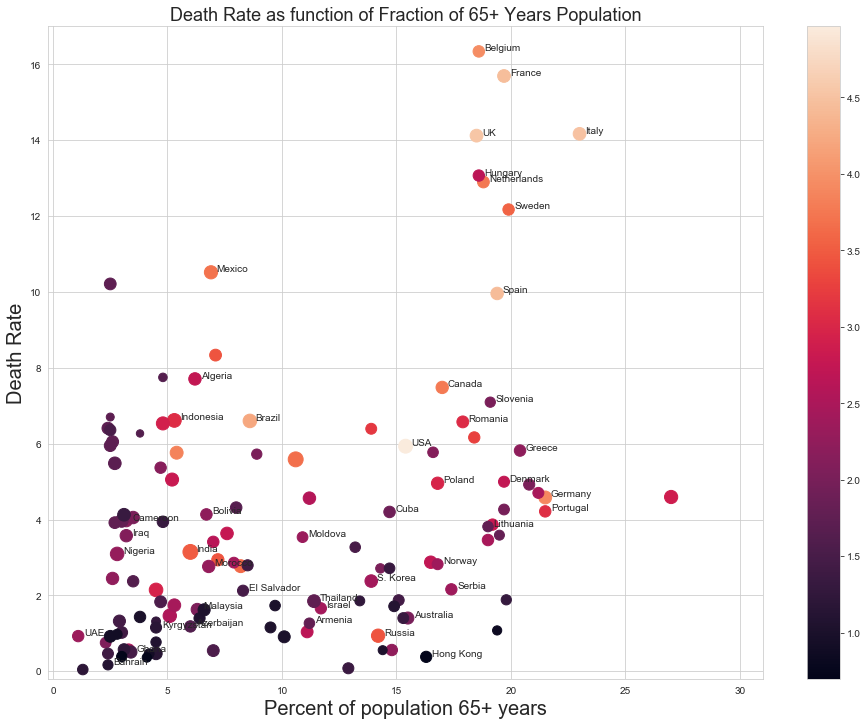

In [110]:
death_rate_percent = 100 * np.array(df_merge['Case Fatality Ratio'])
percent_older = 100 * np.array(df_merge['Fraction age 65+ years'])

total_num_deaths = np.array(df_merge['Total Deaths'])
population = np.array(df_merge['Population'])

plt.figure(figsize=(16,12))
plt.scatter(x=percent_older, y=death_rate_percent, 
            s=0.5*np.power(np.log(1+population),2), 
            c=np.log10(1+total_num_deaths))
plt.colorbar()
plt.ylabel('Death Rate', fontsize=20)
plt.xlabel('Percent of population 65+ years', fontsize=20)
plt.title('Death Rate as function of Fraction of 65+ Years Population', fontsize=18)
plt.ylim(-0.2,17)
plt.xlim(-0.2,31)

# plot on top of the figure the names of the
countries_to_display = ['USA', 'Russia', 'Spain', 'Brazil', 'UK', 'Italy', 'France', 
                        'Germany', 'India', 'Canada', 'Belgium', 'Mexico', 'Netherlands', 
                        'Sweden', 'Portugal', 'UAE', 'Poland', 'Indonesia', 'Romania', 
                        'Israel','Thailand','Kyrgyzstan','El Salvador', 'S. Korea', 
                        'Denmark', 'Serbia', 'Norway', 'Algeria', 'Bahrain','Slovenia',
                        'Greece','Cuba','Hong Kong','Lithuania', 'Australia', 'Morocco', 
                        'Malaysia', 'Nigeria', 'Moldova', 'Ghana', 'Armenia', 'Bolivia', 
                        'Iraq', 'Hungary', 'Cameroon', 'Azerbaijan']
for country_name in countries_to_display:
    country_index = df_most_affected.index[df_merge['Country'] == country_name]
    plt.text(x=percent_older[country_index] + 0.25,
             y=death_rate_percent[country_index] + 0.02,
             s=country_name, fontsize=10)

Right side of the graph color bar represents the total number of deaths (on a log scale).

Graph present us the plotting of the countries with respect to the percentage of population which is above the age of 65 years cases is being related to the death rate of the for each countries on a single day.

In the above scale we could see that Death rate is maximum for the country Belgium whichis followed by france, Italy , UK but in this graph they are on the right side which represent high in percentage of population above age 65 yearsof age.

For India I could see that the persentage of the population above the age of 65 years is near to 6% to 7%, where the death rate is almost 3.4.

### Calculate the mean fraction of 65+ years

In [112]:
good_testing_age_df = good_testing_df.merge(df_a, on='Country')
good_testing_age_df

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Case Fatality Ratio,Num Tests per Positive Case,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,2020-05-18,UAE,9875965,1600923.0,24190.0,224.0,9577.0,1.0,14389.0,0.009260,66.181191,0.139,0.850,0.011
1,2020-05-18,Poland,37851327,636046.0,18885.0,936.0,7628.0,160.0,10321.0,0.049563,33.679958,0.148,0.684,0.168
2,2020-05-18,Israel,8638917,505702.0,16643.0,276.0,13253.0,52.0,3114.0,0.016584,30.385267,0.279,0.604,0.117
3,2020-05-18,S. Korea,51264120,753211.0,11065.0,263.0,9904.0,55.0,898.0,0.023769,68.071487,0.135,0.726,0.139
4,2020-05-18,Denmark,5789832,463016.0,10968.0,548.0,9301.0,26.0,1119.0,0.049964,42.215171,0.165,0.638,0.197
5,2020-05-18,Czechia,10706690,356515.0,8586.0,297.0,5641.0,36.0,2648.0,0.034591,41.522828,0.154,0.656,0.190
6,2020-05-18,Bahrain,1693667,243031.0,7184.0,12.0,2931.0,8.0,4241.0,0.001670,33.829482,0.197,0.779,0.024
7,2020-05-18,Australia,25464216,1062034.0,7060.0,99.0,6392.0,12.0,569.0,0.014023,150.429745,0.190,0.655,0.155
8,2020-05-18,Malaysia,32315733,443263.0,6941.0,113.0,5615.0,13.0,1213.0,0.016280,63.861547,0.243,0.694,0.063
9,2020-05-18,Kazakhstan,18749587,540708.0,6440.0,35.0,3469.0,31.0,2936.0,0.005435,83.960870,0.279,0.651,0.070


In [113]:
fraction_older = sum(good_testing_age_df['Total Deaths'] * good_testing_age_df['Fraction age 65+ years']) / sum(good_testing_age_df['Total Deaths'])
estimated_fraction = good_testing_age_df['Total Deaths'].sum() / good_testing_age_df['Total Cases'].sum()

print('Estimtaed fraction for a country with %.1f%s of population older than 65 years old is %.2f%s' %(100 * fraction_older,'%',100 * estimated_fraction,'%'))

Estimtaed fraction for a country with 14.8% of population older than 65 years old is 2.59%


In [115]:
all_countries_age_df = lastdate_df.merge(df_a, on='Country')
all_countries_age_df['Estimated Infection Fatality Ratio'] = (all_countries_age_df['Fraction age 65+ years'] / fraction_older) * estimated_fraction
all_countries_age_df

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Case Fatality Ratio,Num Tests per Positive Case,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years,Estimated Infection Fatality Ratio
0,2020-05-18,USA,330774664,12300744.0,1550294.0,91981.0,356383.0,16868.0,1101930.0,0.059331,7.934459,0.189,0.657,0.154,0.026980
1,2020-05-18,Russia,145927292,7147014.0,290678.0,2722.0,70209.0,2300.0,217747.0,0.009364,24.587392,0.176,0.682,0.142,0.024877
2,2020-05-18,Spain,46752703,3037840.0,278188.0,27709.0,196958.0,1152.0,53521.0,0.099605,10.920097,0.147,0.659,0.194,0.033987
3,2020-05-18,Brazil,212380932,735224.0,255368.0,16853.0,100459.0,8318.0,138056.0,0.065995,2.879076,0.217,0.697,0.086,0.015067
4,2020-05-18,UK,67844241,2682716.0,246406.0,34796.0,NaN,1559.0,NaN,0.141214,10.887381,0.177,0.638,0.185,0.032411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,2020-05-18,St. Barth,9874,NaN,6.0,NaN,6.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
209,2020-05-18,Western Sahara,595462,NaN,6.0,NaN,6.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
210,2020-05-18,Anguilla,14987,NaN,3.0,NaN,3.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
211,2020-05-18,Lesotho,2140235,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,0.354,0.601,0.045,0.007884


In [116]:
# Dropping Date column:
all_countries_age_df.drop("Date", axis=1,inplace=True)
all_countries_age_df.drop("Fraction age 0-14 years", axis=1,inplace=True)


In [118]:
data_frame_list = [all_countries_age_df]
for all_countries_age_df in data_frame_list:
    all_countries_age_df.ffill(inplace=True)
print (data_frame_list)

[                   Country  Population  Total Tests  Total Cases  \
0                      USA   330774664   12300744.0    1550294.0   
1                   Russia   145927292    7147014.0     290678.0   
2                    Spain    46752703    3037840.0     278188.0   
3                   Brazil   212380932     735224.0     255368.0   
4                       UK    67844241    2682716.0     246406.0   
..                     ...         ...          ...          ...   
208              St. Barth        9874        357.0          6.0   
209         Western Sahara      595462        357.0          6.0   
210               Anguilla       14987        357.0          3.0   
211                Lesotho     2140235        357.0          1.0   
212  Saint Pierre Miquelon        5797        357.0          1.0   

     Total Deaths  Total Recovered  Serious or Critical  Active Cases  \
0         91981.0         356383.0              16868.0     1101930.0   
1          2722.0          70209.0  

In [119]:
#no null values present:
all_countries_age_df.isnull().sum()

Country                               0
Population                            0
Total Tests                           0
Total Cases                           0
Total Deaths                          0
Total Recovered                       0
Serious or Critical                   0
Active Cases                          0
Case Fatality Ratio                   0
Num Tests per Positive Case           0
Fraction age 15-64 years              0
Fraction age 65+ years                0
Estimated Infection Fatality Ratio    0
dtype: int64

### LabelEncoder

In [123]:
from sklearn.preprocessing import LabelEncoder

categorical_features = list(all_countries_age_df.select_dtypes(include=['object']).columns)
label_encoder_feat = {}
for i, feature in enumerate(categorical_features):
    label_encoder_feat[feature] = LabelEncoder()
    all_countries_age_df[feature] = label_encoder_feat[feature].fit_transform(all_countries_age_df[feature])

all_countries_age_df.head()

,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Case Fatality Ratio,Num Tests per Positive Case,Fraction age 15-64 years,Fraction age 65+ years,Estimated Infection Fatality Ratio
0,201,330774664,12300744.0,1550294.0,91981.0,356383.0,16868.0,1101930.0,0.059331,7.934459,0.657,0.154,0.026980
1,158,145927292,7147014.0,290678.0,2722.0,70209.0,2300.0,217747.0,0.009364,24.587392,0.682,0.142,0.024877
2,180,46752703,3037840.0,278188.0,27709.0,196958.0,1152.0,53521.0,0.099605,10.920097,0.659,0.194,0.033987
3,26,212380932,735224.0,255368.0,16853.0,100459.0,8318.0,138056.0,0.065995,2.879076,0.697,0.086,0.015067
4,200,67844241,2682716.0,246406.0,34796.0,100459.0,1559.0,138056.0,0.141214,10.887381,0.638,0.185,0.032411


### Removing Outliers

In [124]:
from scipy.stats import zscore
z_score=abs(zscore(all_countries_age_df))
print(all_countries_age_df.shape)

(213, 13)


In [126]:
df=all_countries_age_df.loc[(z_score<4).all(axis=1)]
print(df.shape)

(199, 13)


### Skewness

In [127]:
df.skew()

Country                               0.003852
Population                            3.845245
Total Tests                           4.973671
Total Cases                           5.261977
Total Deaths                          8.272291
Total Recovered                       5.968228
Serious or Critical                   6.588414
Active Cases                          4.498256
Case Fatality Ratio                   1.052236
Num Tests per Positive Case           3.217091
Fraction age 15-64 years             -0.037886
Fraction age 65+ years                0.943032
Estimated Infection Fatality Ratio    0.943032
dtype: float64

In [128]:
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [129]:
df.skew()

Country                               0.003852
Population                           -0.805011
Total Tests                          -0.292701
Total Cases                          -0.104058
Total Deaths                          0.764346
Total Recovered                       0.067170
Serious or Critical                   1.207580
Active Cases                         -0.222005
Case Fatality Ratio                   0.969575
Num Tests per Positive Case           0.028374
Fraction age 15-64 years             -0.037886
Fraction age 65+ years                0.883922
Estimated Infection Fatality Ratio    0.931451
dtype: float64

In [131]:
#chaning columns:
mid = df['Case Fatality Ratio']
df.drop(labels=['Case Fatality Ratio'], axis=1, inplace = True)
df.insert(0, 'Case Fatality Ratio', mid)
df.head(2)

,Case Fatality Ratio,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Num Tests per Positive Case,Fraction age 15-64 years,Fraction age 65+ years,Estimated Infection Fatality Ratio
5,0.132514,98,17.917690,14.927818,12.327790,10.373741,11.754514,6.620073,11.105769,2.671674,0.635,0.207014,0.039504
6,0.145785,69,17.993841,14.140946,12.100312,10.248495,11.030509,7.600402,11.407132,2.162809,0.622,0.179818,0.033931


### Assigning X AND Y Variables:

In [132]:
x=df.iloc[:,1:13]
x.shape
x

,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Num Tests per Positive Case,Fraction age 15-64 years,Fraction age 65+ years,Estimated Infection Fatality Ratio
5,98,17.917690,14.927818,12.327790,10.373741,11.754514,6.620073,11.105769,2.671674,0.635,0.207014,0.039504
6,69,17.993841,14.140946,12.100312,10.248495,11.030509,7.600402,11.407132,2.162809,0.622,0.179818,0.033931
8,197,18.249063,14.316368,11.922343,8.336151,11.622479,6.806829,10.458694,2.481365,0.669,0.078811,0.014264
9,93,18.244691,13.461177,11.715809,8.861917,11.468576,7.738488,9.892174,1.906285,0.709,0.052592,0.009416
11,152,17.309466,13.401710,11.460937,7.933797,10.319134,6.765039,11.032290,2.074956,0.655,0.069526,0.012535
...,...,...,...,...,...,...,...,...,...,...,...,...
208,182,9.197762,5.880533,1.945910,0.693147,1.945910,1.609438,0.000000,4.102643,0.603,0.037296,0.006635
209,209,13.297095,5.880533,1.945910,0.693147,1.945910,1.609438,0.000000,4.102643,0.603,0.037296,0.006635
210,5,9.615005,5.880533,1.386294,0.693147,1.386294,1.609438,0.000000,4.102643,0.603,0.037296,0.006635
211,110,14.576427,5.880533,0.693147,0.693147,1.386294,1.609438,0.693147,4.102643,0.601,0.044017,0.007853


In [133]:
y=df.iloc[:,0:1]
y.shape
y.head()

,Case Fatality Ratio
5,0.132514
6,0.145785
8,0.027321
9,0.056013
11,0.028955


### Using Standard Scaler:
To bring all the values at the same scale

In [134]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler(copy=True, with_mean=True, with_std=True).fit(x)
df1_x_scaler = scaler.transform(x)
x = pd.DataFrame(df1_x_scaler)
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.099548,1.159801,2.026698,2.176072,3.058665,2.323382,2.593189,1.843427,-0.457304,0.053020,2.402045,2.460734
1,-0.579493,1.190471,1.715616,2.088621,3.003761,2.037968,3.184907,1.940422,-0.881695,-0.144111,1.898912,1.919155
2,1.538882,1.293260,1.784967,2.020202,2.165446,2.271332,2.705913,1.635162,-0.616021,0.568593,0.030234,0.007894
3,-0.182297,1.291499,1.446875,1.940802,2.395927,2.210661,3.268255,1.452825,-1.095635,1.175150,-0.454824,-0.463203
4,0.794141,0.914843,1.423365,1.842820,1.989066,1.757532,2.680689,1.819777,-0.954964,0.356299,-0.141545,-0.160093


## MODEL SELECTION
Using different types of model in oder to acquire optimum solution:

In [135]:
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=r_state)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2_score corresponding to random state: ",r_state,"is: ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print()
    print()
    print("max r2_score correspondint to: ",final_r_state,"is ",max_r_score)
    return final_r_state

### Linear Regression

In [136]:
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

r2_score corresponding to random state:  42 is:  0.6958837322291674
r2_score corresponding to random state:  43 is:  0.8204432157428432
r2_score corresponding to random state:  44 is:  0.6574621490866002
r2_score corresponding to random state:  45 is:  0.7606136020294355
r2_score corresponding to random state:  46 is:  0.6996616271872287
r2_score corresponding to random state:  47 is:  0.7536743923789626
r2_score corresponding to random state:  48 is:  0.8560692595928829
r2_score corresponding to random state:  49 is:  0.7846769548110888
r2_score corresponding to random state:  50 is:  0.7685775094012917
r2_score corresponding to random state:  51 is:  0.7381043283617024
r2_score corresponding to random state:  52 is:  0.8501335819234681
r2_score corresponding to random state:  53 is:  0.8422196108807855
r2_score corresponding to random state:  54 is:  0.7672523305464835
r2_score corresponding to random state:  55 is:  0.9082822396557254
r2_score corresponding to random state:  56 is: 

In [151]:
pred_lreg=lreg.predict(x_test)
pred_lreg

array([[-0.00607909],
       [ 0.04764854],
       [ 0.07044208],
       [ 0.06779346],
       [ 0.08689781],
       [ 0.057713  ],
       [-0.00755167],
       [ 0.0554521 ],
       [ 0.01517004],
       [ 0.06507885],
       [ 0.05691209],
       [ 0.03376303],
       [ 0.07191339],
       [ 0.05197771],
       [ 0.09175398],
       [ 0.10661385],
       [ 0.0737753 ],
       [ 0.04539128],
       [ 0.01664087],
       [ 0.04476058],
       [ 0.0371811 ],
       [-0.02779167],
       [ 0.01300677],
       [ 0.04042871],
       [-0.00508045],
       [ 0.05841451],
       [ 0.03961556],
       [ 0.04046115],
       [ 0.05255713],
       [ 0.07593899],
       [ 0.02115724],
       [ 0.06951437],
       [ 0.00311341],
       [ 0.08667102],
       [ 0.02970218],
       [ 0.02227346],
       [ 0.02513903],
       [ 0.04121887],
       [ 0.09315335],
       [ 0.00507657]])

In [152]:
print("Test Results for Linear Regression Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mean_squared_error(y_test,pred_lreg)))
print("R-squared: ", r2_score(y_test,pred_lreg))

Test Results for Linear Regression Model:
--------------------------------------------------
Root mean squared error:  0.012426374583153781
R-squared:  0.8275971685426811


### KNeighborsRegressor

In [137]:
from sklearn.neighbors import KNeighborsRegressor
neighbors={"n_neighbors":range(1,30)}
knn= KNeighborsRegressor()
gknn=GridSearchCV(knn,neighbors,cv=10)
gknn.fit(x,y)
gknn.best_params_

{'n_neighbors': 7}

In [138]:
knn= KNeighborsRegressor(n_neighbors=7)
r_state=maxr2_score(knn,x,y)

r2_score corresponding to random state:  42 is:  0.36348462787058333
r2_score corresponding to random state:  43 is:  0.5057123762221776
r2_score corresponding to random state:  44 is:  0.46577911314771825
r2_score corresponding to random state:  45 is:  0.26664696816751754
r2_score corresponding to random state:  46 is:  0.4417893100396575
r2_score corresponding to random state:  47 is:  0.20644276827477614
r2_score corresponding to random state:  48 is:  0.5207426732815765
r2_score corresponding to random state:  49 is:  0.416375810653973
r2_score corresponding to random state:  50 is:  0.4236451085794314
r2_score corresponding to random state:  51 is:  0.30389030067236333
r2_score corresponding to random state:  52 is:  0.489272522378561
r2_score corresponding to random state:  53 is:  0.4635946630009883
r2_score corresponding to random state:  54 is:  0.49760946797236516
r2_score corresponding to random state:  55 is:  0.5602303219518255
r2_score corresponding to random state:  56 

### Lasso

In [139]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
isreh=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
grid=GridSearchCV(isreh,parameters,cv=10)
grid.fit(x,y)
grid.best_params_

{'alpha': 0.001}

In [140]:
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=r_state)
    lasso=Lasso(alpha=0.001)
    lasso.fit(x_train,y_train)
    y_pred=lasso.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state,"is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2_score correspondint to: ",final_r_state,"is ",max_r_score)

r2_score corresponding to random state:  42 is:  0.6883470905922114
r2_score corresponding to random state:  43 is:  0.7477772737069244
r2_score corresponding to random state:  44 is:  0.6810996379068507
r2_score corresponding to random state:  45 is:  0.6985863921518296
r2_score corresponding to random state:  46 is:  0.700339812455828
r2_score corresponding to random state:  47 is:  0.6697369479822153
r2_score corresponding to random state:  48 is:  0.8280477818920633
r2_score corresponding to random state:  49 is:  0.7713981784435513
r2_score corresponding to random state:  50 is:  0.7637304126695674
r2_score corresponding to random state:  51 is:  0.6997647995352686
r2_score corresponding to random state:  52 is:  0.8055721572646992
r2_score corresponding to random state:  53 is:  0.8199950858131344
r2_score corresponding to random state:  54 is:  0.7537619880041019
r2_score corresponding to random state:  55 is:  0.9044607696039834
r2_score corresponding to random state:  56 is:  

In [153]:
pred_lasso=lasso.predict(x_test)

In [154]:
print("Test Results for Lasso Regression Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mean_squared_error(y_test,pred_lasso)))
print("R-squared: ", r2_score(y_test,pred_lasso))

Test Results for Lasso Regression Model:
--------------------------------------------------
Root mean squared error:  0.0133251427187081
R-squared:  0.8017563657186475


In [141]:
#Errors:
print('Mean absolute error : ',mean_absolute_error(y_test,y_pred))
print('Mean Squared error : ',mean_squared_error(y_test,y_pred))
print("RMSE is : ",np.sqrt(mean_squared_error(y_test,y_pred)))

Mean absolute error :  0.010975826964025171
Mean Squared error :  0.00017755942847393947
RMSE is :  0.0133251427187081


In [142]:
from math import log
from math import sqrt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
estimator = RandomForestRegressor()
param_grid = { 
            "n_estimators"      : [10,50,100,200,500],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

grid.fit(x_train, y_train)

grid.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_split': 4,
 'n_estimators': 100}

In [158]:
rr=RandomForestRegressor(bootstrap=True,max_features='auto',min_samples_split=2,n_estimators=100)
rr.fit(x_train, y_train)
rr.score(x_train,y_train)

0.9518626697875854

In [159]:
pred=rr.predict(x_test)
pred

array([0.01512902, 0.03110322, 0.07259961, 0.05576446, 0.08699436,
       0.03658689, 0.01072043, 0.05547854, 0.02141681, 0.05621246,
       0.05085603, 0.02775365, 0.05759577, 0.03572751, 0.08991101,
       0.11602642, 0.04523558, 0.05676057, 0.03121363, 0.02574674,
       0.02384888, 0.00909489, 0.01973883, 0.03499346, 0.01670079,
       0.03905972, 0.03916154, 0.04085754, 0.04139225, 0.06935632,
       0.0183423 , 0.06131123, 0.02152603, 0.07062426, 0.02296734,
       0.02154206, 0.02562142, 0.03206648, 0.07219718, 0.01158991])

In [160]:
print("Test Results for Random Forest Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mean_squared_error(y_test,pred)))
print("R-squared: ", r2_score(y_test,pred))

Test Results for Random Forest Regressor Model:
--------------------------------------------------
Root mean squared error:  0.013466527298433935
R-squared:  0.7975271742929406


### DecisionTreeRegressor

In [161]:
from sklearn.tree import DecisionTreeRegressor
depth =list(range(3,30))
param_grid =dict(max_depth =depth)
tree =GridSearchCV(DecisionTreeRegressor(),param_grid,cv =10)
tree.fit(x_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23,

In [162]:
print(tree.best_estimator_)
tree.best_params_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=15,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')


{'max_depth': 15}

In [163]:
y_train_pred =tree.predict(x_train)
y_test_pred =tree.predict(x_test)

In [164]:
print("Train Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mean_squared_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  0.00010080421771220069
R-squared:  0.9999930291321665


In [165]:
print("Test Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mean_squared_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  0.020184240498007128
R-squared:  0.5451372876331246


### GradientBoostingRegressor

In [166]:
from sklearn.ensemble import GradientBoostingRegressor
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.20)
model = GradientBoostingRegressor()
parameters = {'learning_rate': [0.001,0.01,0.1,0.02,0.03,1],
              'subsample'    : [0.9, 0.5, 0.2],
              'n_estimators' : [100,500,1000],
              'max_depth'    : [4,6,8]}
grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(x_train, y_train)
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 1000, 'subsample': 0.9}

In [168]:
gbr= GradientBoostingRegressor(learning_rate=0.1,max_depth=4,n_estimators=1000,subsample=0.9)
gbr.fit(x_train, y_train)
gbr.score(x_train,y_train)

0.9999278112688513

In [169]:
pred_gbr=gbr.predict(x_test)

In [170]:
print("Test Results for GradientBoostingRegressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mean_squared_error(y_test,pred_gbr)))
print("R-squared: ", r2_score(y_test,pred_gbr))

Test Results for GradientBoostingRegressor Model:
--------------------------------------------------
Root mean squared error:  0.02088292449469821
R-squared:  0.7196236437150226


### Cross_val_score

In [171]:
print("Mean r2 score for Linear Regression: ",cross_val_score(lreg,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation r2 score for Linear Regression: ",cross_val_score(lreg,x,y,cv=5,scoring="r2").std())
print()
print()
print("Mean r2 score for knn: ",cross_val_score(knn,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation r2 score for knn: ",cross_val_score(knn,x,y,cv=5,scoring="r2").std())
print()
print()
print("Mean r2 score for R_forest Regressor ",cross_val_score(rr,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation r2 score for R_forst Regressor ",cross_val_score(rr,x,y,cv=5,scoring="r2").std())
print()
print()
print("Mean r2 score for lasso ",cross_val_score(lasso,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation r2 score for lasso ",cross_val_score(lasso,x,y,cv=5,scoring="r2").std())
print()
print()
print("Mean r2 score for GBR ",cross_val_score(gbr,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation r2 score for GBR ",cross_val_score(gbr,x,y,cv=5,scoring="r2").std())
print()
print()
print("Mean r2 score for DTC ",cross_val_score(tree,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation r2 score for DTC ",cross_val_score(tree,x,y,cv=5,scoring="r2").std())

Mean r2 score for Linear Regression:  0.7194450857783083
Standard Deviation r2 score for Linear Regression:  0.08302552654823885


Mean r2 score for knn:  -0.1978061302931549
Standard Deviation r2 score for knn:  0.3882678812293531


Mean r2 score for R_forest Regressor  0.23731334102729118
Standard Deviation r2 score for R_forst Regressor  0.1068901835184972


Mean r2 score for lasso  0.610898472635875
Standard Deviation r2 score for lasso  0.17487253777207826


Mean r2 score for GBR  0.20816339172535922
Standard Deviation r2 score for GBR  0.39218378155565725


Mean r2 score for DTC  -1.1459890187607413
Standard Deviation r2 score for DTC  1.5631269085533968


## Choosing A Model

In above all the models I am going to choose Linear Regression as the best and final model for the production or prediction of the Death rate in all the coutries.

I am going to choose this model as it is predicting the accuracy score of 91.00% where as where the test result also shows almost 82.75% which is grater than any other model which have been tested above, there are few models suc as random forest regressor , gbr and dtc where the training accuracy score is 99% and above but the test result is relatively less than Linear Regression.

Hence I am choosing:
#### Linear Regression Model

## Saving the Model:

In [172]:
from sklearn.externals import joblib

In [173]:
joblib.dump(lreg,'Project_18_Covid19_Death_rate_Analysis.obj')

['Project_18_Covid19_Death_rate_Analysis.obj']

In [174]:
#loading back the model:
model=joblib.load('Project_18_Covid19_Death_rate_Analysis.obj')

In [175]:
#Pridicting x_test Linear Regression Model = lreg
lreg.predict(x_test)

array([[ 0.05774831],
       [ 0.05929174],
       [ 0.07836305],
       [ 0.08795177],
       [ 0.10400713],
       [-0.00652656],
       [ 0.04170851],
       [ 0.09052121],
       [ 0.05309981],
       [ 0.07056131],
       [ 0.09190589],
       [ 0.01387045],
       [ 0.0889531 ],
       [ 0.04718006],
       [ 0.0613086 ],
       [ 0.11659468],
       [ 0.04476058],
       [ 0.1056589 ],
       [ 0.06040796],
       [ 0.08201523],
       [ 0.01478624],
       [ 0.08232467],
       [-0.01333897],
       [ 0.057713  ],
       [ 0.06844509],
       [ 0.01079888],
       [ 0.06477187],
       [ 0.01629351],
       [ 0.01798777],
       [ 0.05230951],
       [ 0.0309793 ],
       [ 0.10120747],
       [ 0.06659501],
       [ 0.03961556],
       [ 0.02970218],
       [-0.00929754],
       [ 0.05255713],
       [ 0.05155885],
       [ 0.02513903],
       [-0.02779167]])